In [2]:
import os
# get list of images file names
images = os.listdir("images")


# create 5 different lists based on what the image name starts with
# 1. "layer"
# 2. "2nd_best_"
# 3. "3rd_best_"
# 4. "4th_best_"
# 5. "5th_best_"

first_best = []
second_best = []
third_best = []
fourth_best = []
fifth_best = []

for image in images:
    if image.startswith("layer"):
        first_best.append(image)
    elif image.startswith("2nd_best_"):
        second_best.append(image)
    elif image.startswith("3rd_best_"):
        third_best.append(image)
    elif image.startswith("4th_best_"):
        fourth_best.append(image)
    elif image.startswith("5th_best_"):
        fifth_best.append(image)


# for each of the images in first_best:
specific_multi_channel_filters = []
for i in range(len(first_best)):
    # layer number is the number that is between "layer_" and _"filter"
    filename = first_best[i]
    before_index = filename.index("layer_")
    filename = filename[before_index + 6:]
    after_index = filename.index("_filter")
    layer_number = int(filename[:after_index])
    filename = filename[after_index + 8:]
    after_index = filename.index(".")
    filter_number = int(filename[:after_index])
    specific_multi_channel_filters.append((layer_number, filter_number))

# sort specific_multi_channel_filters by the first element of the tuple
specific_multi_channel_filters, first_best = zip(*sorted(zip(specific_multi_channel_filters, first_best), key=lambda x: x[0][0]))


specific_filters = []
for i in range(1, len(first_best)):
    (layer_number, multi_channel_filter) = specific_multi_channel_filters[i]
    single_channel_filter = specific_multi_channel_filters[i-1][1]
    specific_filters.append((layer_number, multi_channel_filter, single_channel_filter))





In [3]:
specific_filters

[(9, 73, 176),
 (11, 7, 73),
 (12, 412, 7),
 (14, 386, 412),
 (16, 627, 386),
 (17, 1214, 627),
 (19, 407, 1214),
 (21, 336, 407),
 (22, 757, 336),
 (23, 757, 757),
 (24, 661, 757),
 (26, 661, 661),
 (28, 418, 661),
 (30, 148, 418),
 (32, 741, 148),
 (33, 579, 741),
 (35, 1016, 579),
 (38, 82, 1016),
 (41, 532, 82),
 (43, 962, 532),
 (45, 470, 962),
 (48, 279, 470),
 (51, 398, 279),
 (53, 631, 398),
 (55, 187, 631),
 (58, 227, 187),
 (61, 303, 227),
 (65, 3, 303)]

In [4]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import keras_cv
from keras_cv.models import StableDiffusion
from keras_cv.models.stable_diffusion.diffusion_model import DiffusionModel
import tensorflow.keras as keras
import time




Stable_diffusion = StableDiffusion(img_height=512, img_width=512)
decoder = Stable_diffusion.decoder

diffusion_model = DiffusionModel(img_width = 512, img_height = 512, max_text_length=0)


2.12.0
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [5]:
cnn_layers_in_order = []

for layer in range(len(diffusion_model.layers)):
    curr_layer = diffusion_model.layers[layer]
    if len(curr_layer.get_weights()) != 0:
        for sublayer in range(len(curr_layer.get_weights())):
            shape = curr_layer.get_weights()[sublayer].shape
            if len(shape) == 4 and shape[0] == 3 and shape[1] == 3:
                cnn_layers_in_order.append((layer, sublayer))

def get_cnn_layer(index):
    return diffusion_model.layers[cnn_layers_in_order[index][0]].get_weights()[cnn_layers_in_order[index][1]]

In [6]:
first_layer = get_cnn_layer(9)

In [7]:
first_layer.shape

(3, 3, 640, 640)

In [13]:
filter = first_layer[:, :, :, 73]
single_channel = filter[:, :, 176]

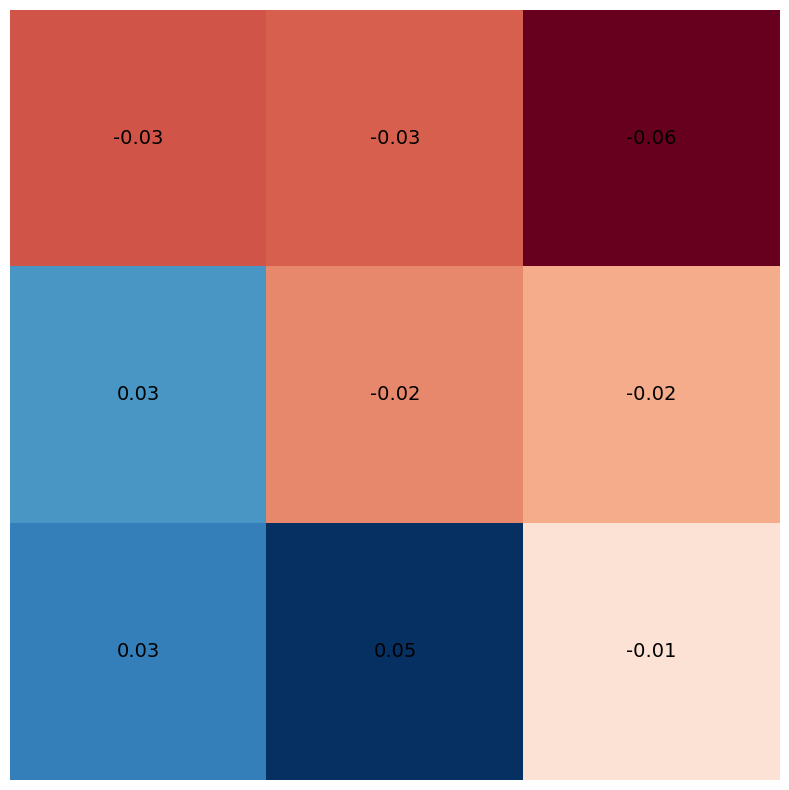

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(15, 10), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

# Set up the colormap
cmap = plt.cm.get_cmap('RdBu').copy()
cmap.set_bad(color='white')

# Display the image
im = axs.imshow(single_channel, cmap=cmap, vmin=-np.max(single_channel), vmax=np.max(single_channel))

# Turn off axis labels
axs.axis("off")

# Add text annotations for each element in the tensor
for i in range(3):
    for j in range(3):
        axs.text(j, i, f"{single_channel[i][j]:.2f}", size=14, ha="center", va="center", color="black")

# Show the figure
plt.show()

